# Risky Business

Harold has been boasting about his recent cryptocurrency returns. He's even bet you five bucks that his trading algorithm has made his returns better than yours. Calculate the standard deviation and sharpe ratio for each your portfolios to determine which portfolio is the better investment based off of the greatest risk to reward ratio.

In [17]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read in data

In [18]:
harold_portfolio_path = Path("../../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../../Resources/my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)

# Drop na
harold_portfolio = harold_portfolio.dropna()
my_portfolio = my_portfolio.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')

harold_portfolio = harold_portfolio.sort_index(ascending=True)
my_portfolio = my_portfolio.sort_index(ascending=True)

harold_portfolio.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-15,8203.32,0.000852,0.003308,217.44,91.69,0.456005,0.224973,0.137002,0.031348,0.020377
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170


In [19]:
my_portfolio.head()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2016-08-24,582.58,0.000236,10.98,3.95,0.005932,0.001912
2016-08-25,578.92,0.000241,11.00,3.84,0.005912,0.001925
2016-08-26,576.16,0.000242,11.34,3.81,0.005892,0.001925
2016-08-27,578.89,0.000228,11.29,3.81,0.005902,0.001931
2016-08-28,570.42,0.000230,11.21,3.78,0.005869,0.002020


### Calculate daily returns 

In [20]:
# Calculate daily returns for each portfolio
harold_returns = harold_portfolio.pct_change().dropna()
my_returns = my_portfolio.pct_change().dropna()
harold_returns.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-16,-0.039540,0.038732,-0.042322,0.145143,0.115280,-0.079600,-0.007365,0.002051,-0.079463,-0.081072
2019-05-17,-0.065398,0.081356,-0.065025,0.061807,-0.063661,-0.079851,0.162057,-0.078094,-0.056728,-0.044486
2019-05-18,-0.013755,0.037618,0.014517,-0.074889,-0.061305,-0.034845,0.108375,0.017944,-0.014585,-0.011569
2019-05-19,0.129103,0.063444,0.057571,-0.043174,-0.035937,0.120632,0.044502,0.098205,0.091489,0.083969
2019-05-20,-0.009952,0.124053,-0.043109,0.115626,0.097057,-0.047156,0.127274,-0.041983,-0.026232,-0.061450


### `Concat` portfolios into one DataFrame

In [21]:
# Concat returns DataFrames
all_returns = pd.concat([harold_returns,my_returns], axis='columns', join='inner')
all_returns.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2019-05-16,-0.039540,0.038732,-0.042322,0.145143,0.115280,-0.079600,-0.007365,0.002051,-0.079463,-0.081072,0.026580,-0.042322,0.145143,0.115280,-0.079600,0.002051
2019-05-17,-0.065398,0.081356,-0.065025,0.061807,-0.063661,-0.079851,0.162057,-0.078094,-0.056728,-0.044486,-0.039540,-0.065025,0.061807,-0.063661,-0.079851,-0.078094
2019-05-18,-0.013755,0.037618,0.014517,-0.074889,-0.061305,-0.034845,0.108375,0.017944,-0.014585,-0.011569,-0.065398,0.014517,-0.074889,-0.061305,-0.034845,0.017944
2019-05-19,0.129103,0.063444,0.057571,-0.043174,-0.035937,0.120632,0.044502,0.098205,0.091489,0.083969,-0.013755,0.057571,-0.043174,-0.035937,0.120632,0.098205
2019-05-20,-0.009952,0.124053,-0.043109,0.115626,0.097057,-0.047156,0.127274,-0.041983,-0.026232,-0.061450,0.129103,-0.043109,0.115626,0.097057,-0.047156,-0.041983


### Calculate `std dev` for all data

In [22]:
# Calculate std dev
all_portfolio_std = all_returns.std()
all_portfolio_std.head()

BTC     0.075492
BTT     0.035761
DOGE    0.050435
ETH     0.096648
LTC     0.088435
dtype: float64

### Calculate `sharpe ratio` for all data

In [23]:
# Calculate sharpe ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head()

BTC      0.019230
BTT     30.647647
DOGE    -4.933319
ETH      6.718279
LTC      1.846506
dtype: float64

### Plot Sharpe Ratios

<AxesSubplot:title={'center':'Sharpe Ratios'}>

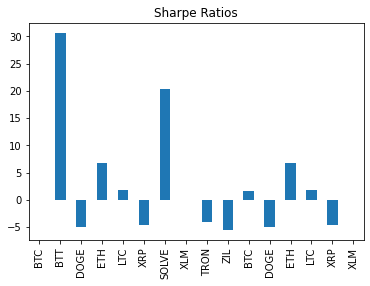

In [24]:
# Plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### How many smart investments did Harold make compared to risky investments? How many did you make?

Out of his 10 investments, Harold only made 4 good investments. Out of the students' 6 investments, 3 of them were smart investments.

### Which cryptos have been the smartest investment?

DOGE, TRON, and XML have been the smartest crypto investments.

### Calculate annualized std dev for each portfolio individually

In [25]:
# Calculate std dev for all investments for each portfolio
harold_std_annual = harold_returns.std() * np.sqrt(252)
my_std_annual = my_returns.std() * np.sqrt(252)

harold_std_annual

BTC      1.198400
BTT      0.567686
DOGE     0.800625
ETH      1.534242
LTC      1.403862
XRP      1.322997
SOLVE    1.077347
XLM      1.059881
TRON     1.045211
ZIL      1.031400
dtype: float64

### Calculate the sharpe ratios for each individual portfolio

In [26]:
# Calculate sharpe ratio
harold_sharpe_ratios = (harold_returns.mean() * 252) / (harold_std_annual)
my_sharpe_ratios = (my_returns.mean() * 252) / (my_std_annual)

my_sharpe_ratios.head()

BTC     1.332250
DOGE    1.105764
ETH     1.307897
LTC     1.221064
XRP     1.281543
dtype: float64

### Average sharpe ratios for each portfolio and output to screen

In [27]:
# Averaging sharpe ratios
harold_sharpe_avg = harold_sharpe_ratios.mean()
my_sharpe_avg = my_sharpe_ratios.mean()

print("Harold's sharpe ratio average:", harold_sharpe_avg)
print("My sharpe ratio average:", my_sharpe_avg)

Harold's sharpe ratio average: 4.022490016642652
My sharpe ratio average: 1.2661366446518427


### Compare Sharpe Ratios Averages

In [28]:
# Use comparison operator to determine if Harold's sharpe ratio avg is greater
harold_sharpe_avg > my_sharpe_avg

True

### Which portfolio is the smartest investment, based off of risk to reward ratio?

My portfolio!